In [ ]:
!pip install plotly ipywidgets --quiet




In [2]:
!apt-get install -y libproj-dev proj-data proj-bin libgeos-dev
!pip install cython
!pip install cartopy


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.12.1-1~jammy0).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (9.3.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.3.1-1~jammy0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 205 kB of archives.
After this operation, 521 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.3.1-1~jammy0 [205 kB]
Fetched 205 kB in 1s (261 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.3.1-1~jammy0_amd64.deb ...
Unpacking proj-bin (9.3.1-1~jammy0) ...
Setting up proj

In [ ]:
pip install cartopy matplotlib pandas


In [4]:
from google.colab import files
uploaded = files.upload()


Saving AntarcticIcebergs_20250627.csv to AntarcticIcebergs_20250627.csv
Saving AntarcticIcebergs_20250522.csv to AntarcticIcebergs_20250522.csv
Saving AntarcticIcebergs_20250418.csv to AntarcticIcebergs_20250418.csv
Saving AntarcticIcebergs_20250306.csv to AntarcticIcebergs_20250306.csv
Saving AntarcticIcebergs_20250214.csv to AntarcticIcebergs_20250214.csv
Saving AntarcticIcebergs_20250110.csv to AntarcticIcebergs_20250110.csv
Saving AntarcticIcebergs_20250828.csv to AntarcticIcebergs_20250828.csv
Saving AntarcticIcebergs_20250724.csv to AntarcticIcebergs_20250724.csv
Saving AntarcticIcebergs_20250918.csv to AntarcticIcebergs_20250918.csv


Start Data:
   Iceberg  Length (NM)  Width (NM)  Latitude  Longitude           Remarks  \
0    A23A           44          40    -75.75     -40.78             belle   
1     A63           11           3    -75.17     -45.42             belle   
2     A64           16          11    -69.73     -60.99  belle (grounded)   
3    A68A           82          26    -59.50     -49.21             belle   
4    A68C            9           5    -57.69     -41.20             belle   

  Last Update  
0   7/17/2020  
1   7/17/2020  
2   7/17/2020  
3   7/17/2020  
4   7/17/2020  
End Data:
   Iceberg  Length (NM)  Width (NM)  Latitude  Longitude Remarks Last Update
0    A23A           40          34    -75.47     -39.65   belle   7/16/2021
1     A63           11           3    -65.87     -56.73   belle   7/16/2021
2     A64           11           8    -67.52     -61.16   belle   7/16/2021
3    A69A           10           9    -67.39     -60.75   belle   7/16/2021
4    A69B           10           7   

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


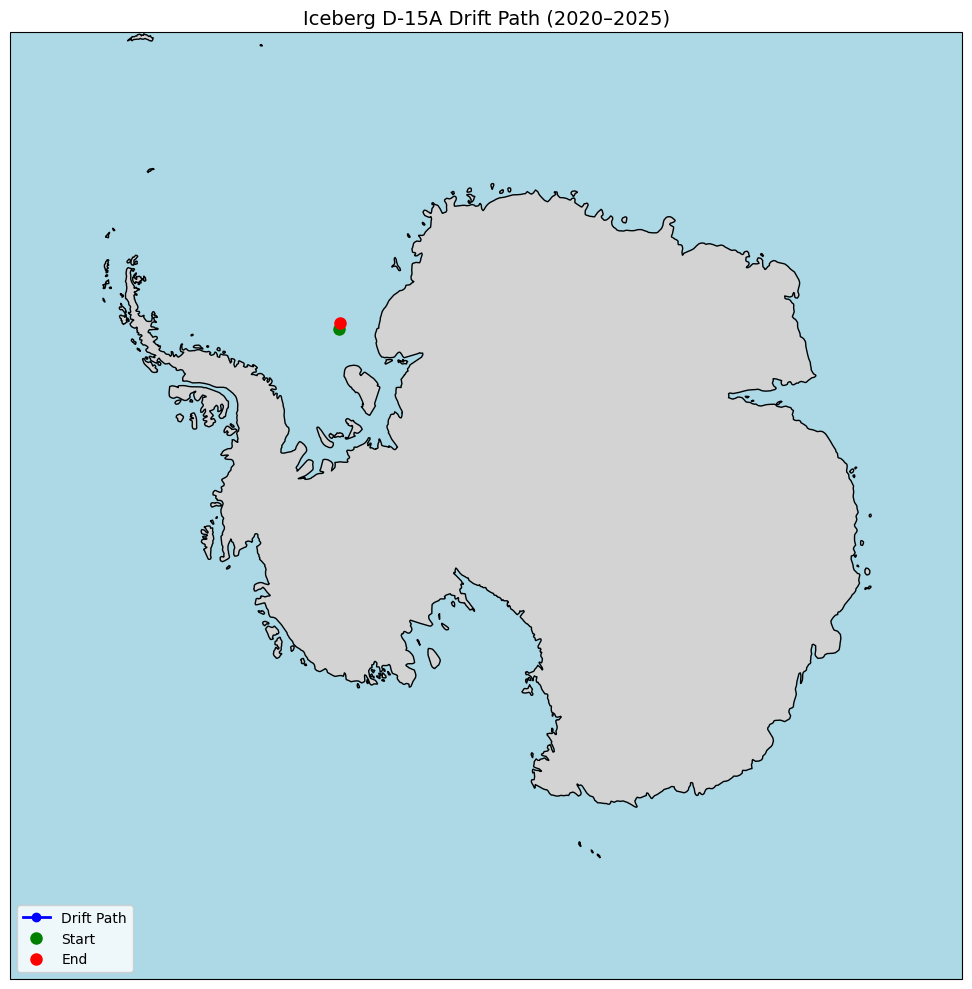

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load iceberg drift data (your latest approach is correct here)
df_start = pd.read_csv("AntarcticIcebergs_20200717.csv")
df_end = pd.read_csv("AntarcticIcebergs_20210716.csv")

# Print to confirm the data loads correctly
print("Start Data:\n", df_start.head())
print("End Data:\n", df_end.head())

# Extract coordinates – adjust column names as needed
start_lat = df_start['Latitude'].iloc[0]
start_lon = df_start['Longitude'].iloc[0]
end_lat = df_end['Latitude'].iloc[0]
end_lon = df_end['Longitude'].iloc[0]

# Set up plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

# Add base map features
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=0, color='lightgray')
ax.add_feature(cfeature.OCEAN, zorder=0, color='lightblue')
ax.coastlines()

# Plot drift path
ax.plot([start_lon, end_lon], [start_lat, end_lat],
        color='blue', linewidth=2, marker='o',
        transform=ccrs.PlateCarree(), label='Drift Path')

# Markers
ax.plot(start_lon, start_lat, 'go', markersize=8, transform=ccrs.PlateCarree(), label='Start')
ax.plot(end_lon, end_lat, 'ro', markersize=8, transform=ccrs.PlateCarree(), label='End')

# Legend and title
plt.legend(loc='lower left')
plt.title('Iceberg D-15A Drift Path (2020–2025)', fontsize=14)
plt.tight_layout()
plt.show()







In [ ]:
pip install panel cartopy matplotlib pandas


In [ ]:
!pip install panel jupyter_bokeh pyngrok geopandas cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


👉 Public URL: NgrokTunnel: "https://e47441022c6a.ngrok-free.app" -> "http://localhost:5006"


OSError: [Errno 98] Address already in use

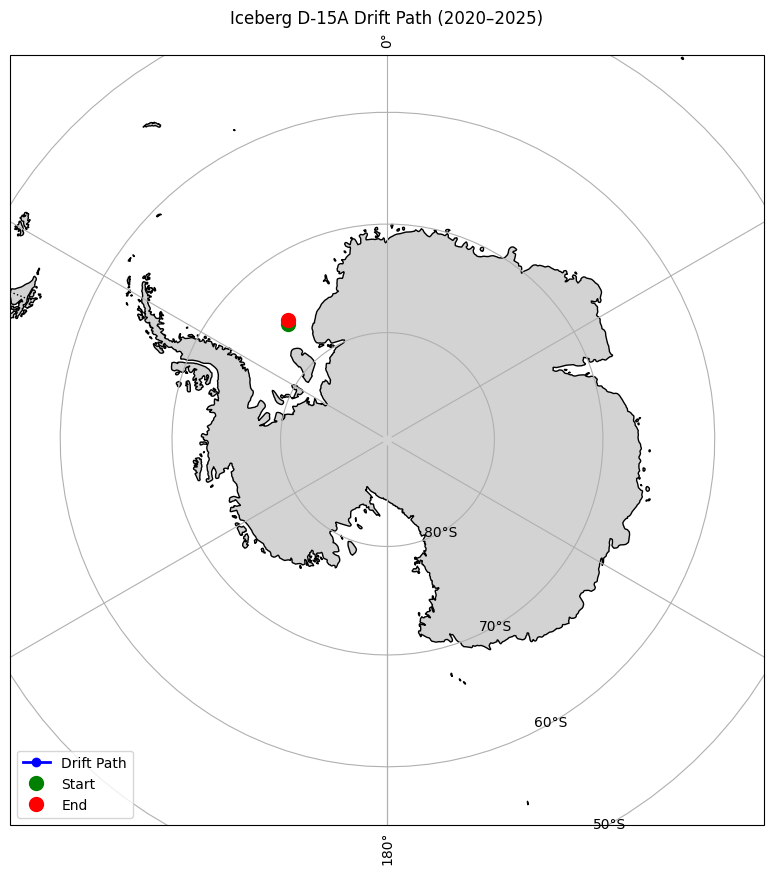

In [ ]:

import panel as pn
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyngrok import ngrok


pn.extension('tabulator', sizing_mode="stretch_width")


df_start = pd.read_csv("AntarcticIcebergs_20200717.csv")
df_end = pd.read_csv("AntarcticIcebergs_20210716.csv")

def plot_drift_map():
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -55], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=True)

    # Plot drift line
    ax.plot(
        [df_start['Longitude'][0], df_end['Longitude'][0]],
        [df_start['Latitude'][0], df_end['Latitude'][0]],
        color='blue', linewidth=2, marker='o',
        transform=ccrs.PlateCarree(),
        label='Drift Path'
    )

    # Mark start and end
    ax.plot(df_start['Longitude'][0], df_start['Latitude'][0], 'go', markersize=10, transform=ccrs.PlateCarree(), label='Start')
    ax.plot(df_end['Longitude'][0], df_end['Latitude'][0], 'ro', markersize=10, transform=ccrs.PlateCarree(), label='End')

    ax.legend(loc='lower left')
    ax.set_title("Iceberg D-15A Drift Path (2020–2025)")
    return fig


dashboard = pn.Column(
    "# Iceberg D-15A Drift Path Dashboard",
    "This dashboard shows the iceberg's drift from July 2020 to July 2025.",
    pn.pane.Matplotlib(plot_drift_map(), tight=True)
)


ngrok.set_auth_token("32KweUivgCnvJnIQz7r7DDSUZC1_47GkHi63sVDtsGSaEQuVr")
public_url = ngrok.connect(5006)
print("👉 Public URL:", public_url)

pn.serve(dashboard, port=5006, address="0.0.0.0", show=False)


In [ ]:
panel serve iceberg_dashboard.py


SyntaxError: invalid syntax (ipython-input-772359883.py, line 1)

In [ ]:
pn.serve(dashboard, show=True)


Launching server at http://localhost:38401


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.distance import geodesic
from matplotlib import cm

def plot_forecast_vs_actual(df_actual):
    np.random.seed(42)

    # Simulate predicted coordinates with directional noise
    noise_lat = np.random.normal(loc=0.05, scale=0.1, size=len(df_actual))
    noise_lon = np.random.normal(loc=-0.1, scale=0.15, size=len(df_actual))

    predicted_lat = df_actual['Latitude'] + noise_lat
    predicted_lon = df_actual['Longitude'] + noise_lon

    # Calculate geodesic error between actual and predicted points
    errors_km = [
        geodesic((lat1, lon1), (lat2, lon2)).kilometers
        for lat1, lon1, lat2, lon2 in zip(df_actual['Latitude'], df_actual['Longitude'], predicted_lat, predicted_lon)
    ]
    max_error = max(errors_km)

    # Normalize error for color/width encoding
    norm = plt.Normalize(0, max_error)
    cmap = cm.get_cmap('viridis')

    # Start plotting
    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=True)

    # Plot actual path
    ax.plot(df_actual['Longitude'], df_actual['Latitude'],
            'b--', linewidth=2, transform=ccrs.PlateCarree(), label="Actual Path")

    # Plot predicted points
    ax.scatter(predicted_lon, predicted_lat,
               c='red', s=30, marker='^', transform=ccrs.PlateCarree(), label="Predicted Points")

    # Draw connecting lines (actual to predicted) with error encoding
    for i in range(len(df_actual)):
        lat1, lon1 = df_actual['Latitude'].iloc[i], df_actual['Longitude'].iloc[i]
        lat2, lon2 = predicted_lat[i], predicted_lon[i]
        error = errors_km[i]

        ax.plot(
            [lon1, lon2],
            [lat1, lat2],
            transform=ccrs.PlateCarree(),
            color=cmap(norm(error)),
            linewidth=1 + 4 * (error / max_error),
            alpha=0.9
        )

    # Colorbar to show error scale
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.6, pad=0.05)
    cbar.set_label("Prediction Error (km)")

    ax.set_title("Iceberg Drift: Actual vs Predicted with Error Encoding", fontsize=15)
    ax.legend(loc='lower left')

    return fig



In [ ]:
pip install haversine


In [ ]:
!apt install libproj-dev proj-data proj-bin
!apt install libgeos-dev
!pip install cartopy geopy


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.3.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.3.1-1~jammy0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 205 kB of archives.
After this operation, 521 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.3.1-1~jammy0 [205 kB]
Fetched 205 kB in 1s (202 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.3.1-1~jammy0_amd64.deb ...
Unpacking proj-bin (9.3.1-1~jammy0) ...
Setting up proj-bin (9.3.1-1~jammy0) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Don

Actual positions:
 [[-66.63  81.92]
 [-66.63  81.91]
 [-66.63  81.91]
 [-66.63  81.92]
 [-66.63  81.92]
 [-66.63  81.92]
 [-66.63  81.92]
 [-66.63  81.92]]
Predicted (synthetic) positions:
 [[-66.62488879  81.95375398]
 [-66.65768578  81.91305694]
 [-66.66002159  81.87388997]]
Distances from actual to predicted:
 [1.5998247033660706, 3.102681777102272, 3.9207861632883767]


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


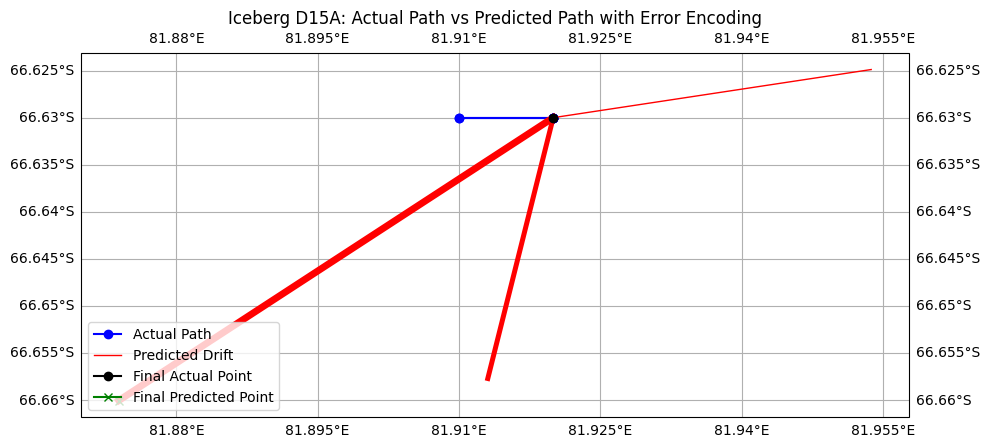

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from geopy.distance import geodesic
import os

# --- 1. Load D15A Data from Multiple Files ---

# List of all monthly files for 2025
file_paths = [
    "AntarcticIcebergs_20250110.csv",
    "AntarcticIcebergs_20250214.csv",
    "AntarcticIcebergs_20250306.csv",
    "AntarcticIcebergs_20250418.csv",
    "AntarcticIcebergs_20250522.csv",
    "AntarcticIcebergs_20250627.csv",
    "AntarcticIcebergs_20250717.csv",
    "AntarcticIcebergs_20250828.csv",
    "AntarcticIcebergs_20250918.csv"
]

actual_positions = []
dates = []

for path in file_paths:
    if os.path.exists(path):
        df = pd.read_csv(path)
        df = df[df['Iceberg'] == 'D15A']
        if not df.empty and 'Latitude' in df.columns and 'Longitude' in df.columns:
            lat = df.iloc[0]['Latitude']
            lon = df.iloc[0]['Longitude']
            if not pd.isnull(lat) and not pd.isnull(lon):
                actual_positions.append((lat, lon))
                dates.append(path[-14:-4])  # extract date from filename

# --- 2. Check Data Validity ---

if len(actual_positions) < 2:
    raise ValueError("Not enough valid D15A points for comparison.")

actual_positions = np.array(actual_positions)
print("Actual positions:\n", actual_positions)

# --- 3. Create Synthetic Path Based on Last Motion + Noise ---

N = 3  # use last 3 motions to estimate
if len(actual_positions) < N + 1:
    raise ValueError("Need at least 4 data points for prediction.")

velocities_lat = np.diff(actual_positions[-(N+1):, 0])
velocities_lon = np.diff(actual_positions[-(N+1):, 1])

mean_velocity_lat = np.mean(velocities_lat)
mean_velocity_lon = np.mean(velocities_lon)

# Predict next 3 positions with added Gaussian noise
predicted_positions = []
start_lat, start_lon = actual_positions[-1]
for i in range(1, 4):
    lat = start_lat + i * mean_velocity_lat + np.random.normal(0, 0.03)
    lon = start_lon + i * mean_velocity_lon + np.random.normal(0, 0.03)
    predicted_positions.append((lat, lon))

predicted_positions = np.array(predicted_positions)
print("Predicted (synthetic) positions:\n", predicted_positions)

# --- 4. Compute Geodesic Distances for Visualization ---

# Compare last actual position to all predicted ones
base_point = actual_positions[-1]
distances = [geodesic(base_point, pt).km for pt in predicted_positions]
print("Distances from actual to predicted:\n", distances)

if len(distances) < 1:
    raise ValueError("Distances list is empty; cannot encode line width.")

norm_distances = np.interp(distances, (min(distances), max(distances)), (1, 5))  # line width scaling

# --- 5. Plot Using Cartopy ---

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Iceberg D15A: Actual Path vs Predicted Path with Error Encoding", fontsize=12)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.gridlines(draw_labels=True)

# Plot actual path
ax.plot(actual_positions[:, 1], actual_positions[:, 0], marker='o', color='blue', label='Actual Path')

# Plot predicted path with line width encoding distance
for i in range(len(predicted_positions)):
    ax.plot(
        [base_point[1], predicted_positions[i][1]],
        [base_point[0], predicted_positions[i][0]],
        color='red',
        linewidth=norm_distances[i],
        label='Predicted Drift' if i == 0 else ""
    )

# Mark final actual and predicted points
ax.plot(base_point[1], base_point[0], marker='o', color='black', label='Final Actual Point')
ax.plot(predicted_positions[-1][1], predicted_positions[-1][0], marker='x', color='green', label='Final Predicted Point')

ax.legend(loc='lower left')
plt.tight_layout()
plt.show()





In [ ]:
print("Loaded actual_positions:\n", actual_positions)
print("Loaded predicted_positions:\n", predicted_positions)
print("Number of points loaded:", len(actual_positions))





Loaded actual_positions:
 []
Loaded predicted_positions:
 []
Number of points loaded: 0



--- Actual vs Predicted Positions with Error ---
   Month  Actual_Lat  Actual_Lon  Pred_Lat   Pred_Lon  Error_km
0      1      -66.63       81.92    -66.63  81.914444  0.245041
1      2      -66.63       81.91    -66.63  81.915278  0.232789
2      3      -66.63       81.91    -66.63  81.916111  0.269545
3      4      -66.63       81.92    -66.63  81.916944  0.134773
4      5      -66.63       81.92    -66.63  81.917778  0.098016
5      6      -66.63       81.92    -66.63  81.918611  0.061260
6      7      -66.63       81.92    -66.63  81.919444  0.024504
7      8      -66.63       81.92    -66.63  81.920278  0.012252
8      9      -66.63       81.92    -66.63  81.921111  0.049008

--- Error Summary ---
Mean Absolute Error (MAE): 0.13 km
Root Mean Squared Error (RMSE): 0.16 km


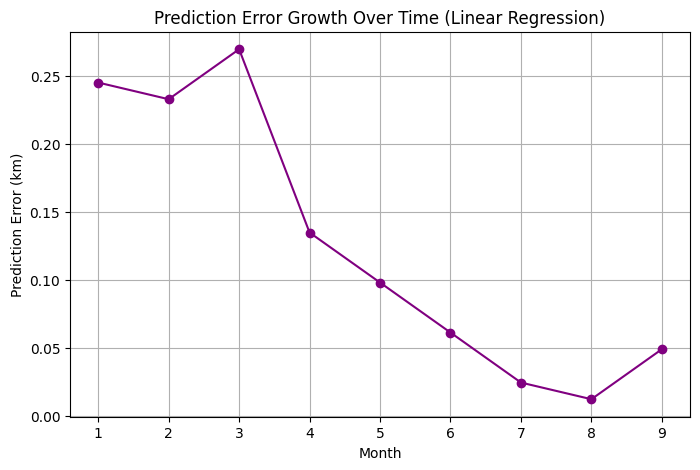

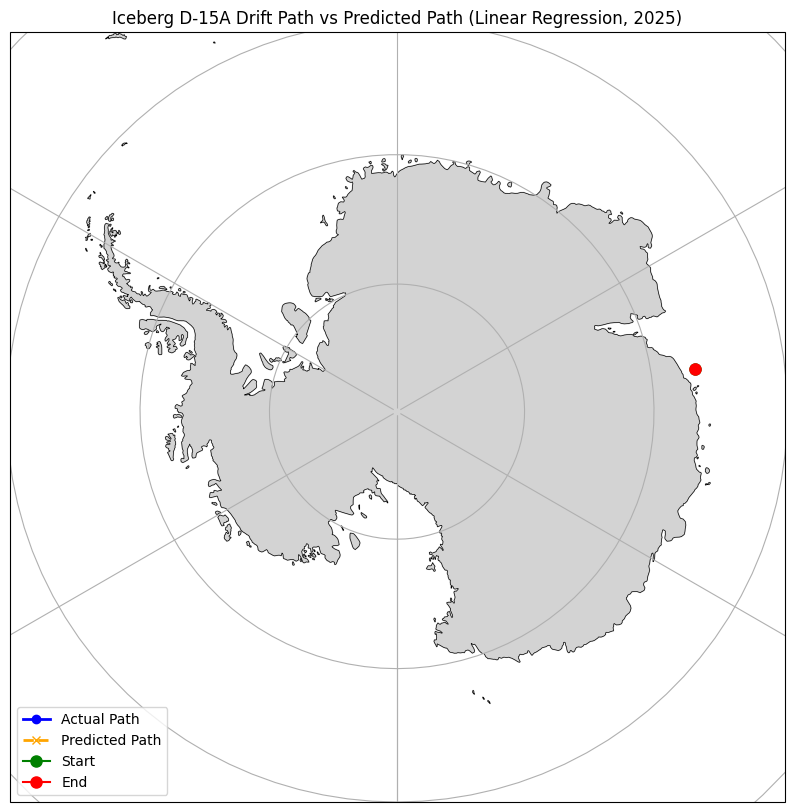

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from math import radians, sin, cos, sqrt, atan2
from sklearn.linear_model import LinearRegression

# Step 1: Load iceberg data

csv_files = [
    "AntarcticIcebergs_20250110.csv",
    "AntarcticIcebergs_20250214.csv",
    "AntarcticIcebergs_20250306.csv",
    "AntarcticIcebergs_20250418.csv",
    "AntarcticIcebergs_20250522.csv",
    "AntarcticIcebergs_20250627.csv",
    "AntarcticIcebergs_20250724.csv",
    "AntarcticIcebergs_20250828.csv",
    "AntarcticIcebergs_20250918.csv"
]

iceberg_d15a_positions = []

for file in csv_files:
    df = pd.read_csv(file)
    df_d15a = df[df["Iceberg"] == "D15A"]
    if not df_d15a.empty:
        lat = df_d15a["Latitude"].values[0]
        lon = df_d15a["Longitude"].values[0]
        iceberg_d15a_positions.append((lat, lon))

# Convert to numpy arrays
lats, lons = zip(*iceberg_d15a_positions)
lats = np.array(lats)
lons = np.array(lons)
months = np.arange(len(lats)).reshape(-1, 1)  # Month indices for regression


#Linear Regression Prediction

lat_model = LinearRegression().fit(months, lats)
lon_model = LinearRegression().fit(months, lons)

pred_lats = lat_model.predict(months)
pred_lons = lon_model.predict(months)

#  Error calculation

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

errors = [haversine(lats[i], lons[i], pred_lats[i], pred_lons[i]) for i in range(len(lats))]

error_df = pd.DataFrame({
    "Month": range(1, len(lats)+1),
    "Actual_Lat": lats,
    "Actual_Lon": lons,
    "Pred_Lat": pred_lats,
    "Pred_Lon": pred_lons,
    "Error_km": errors
})

print("\n--- Actual vs Predicted Positions with Error ---")
print(error_df)


#Error metrics

MAE = np.mean(np.abs(errors))
RMSE = np.sqrt(np.mean(np.array(errors)**2))

print("\n--- Error Summary ---")
print(f"Mean Absolute Error (MAE): {MAE:.2f} km")
print(f"Root Mean Squared Error (RMSE): {RMSE:.2f} km")


# Error growth plot

plt.figure(figsize=(8, 5))
plt.plot(error_df["Month"], error_df["Error_km"], marker='o', color="purple")
plt.xlabel("Month")
plt.ylabel("Prediction Error (km)")
plt.title("Prediction Error Growth Over Time (Linear Regression)")
plt.grid(True)
plt.show()


# Visualization on Antarctic map

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.gridlines()

# Actual path
ax.plot(lons, lats, transform=ccrs.PlateCarree(), color='blue', marker='o',
        linewidth=2, label="Actual Path")

# Predicted path
ax.plot(pred_lons, pred_lats, transform=ccrs.PlateCarree(), color='orange',
        marker='x', linewidth=2, linestyle="--", label="Predicted Path")

# Start and End markers
ax.plot(lons[0], lats[0], marker='o', color='green', markersize=8,
        transform=ccrs.PlateCarree(), label='Start')

ax.plot(lons[-1], lats[-1], marker='o', color='red', markersize=8,
        transform=ccrs.PlateCarree(), label='End')

plt.title("Iceberg D-15A Drift Path vs Predicted Path (Linear Regression, 2025)")
plt.legend(loc='lower left')
plt.show()






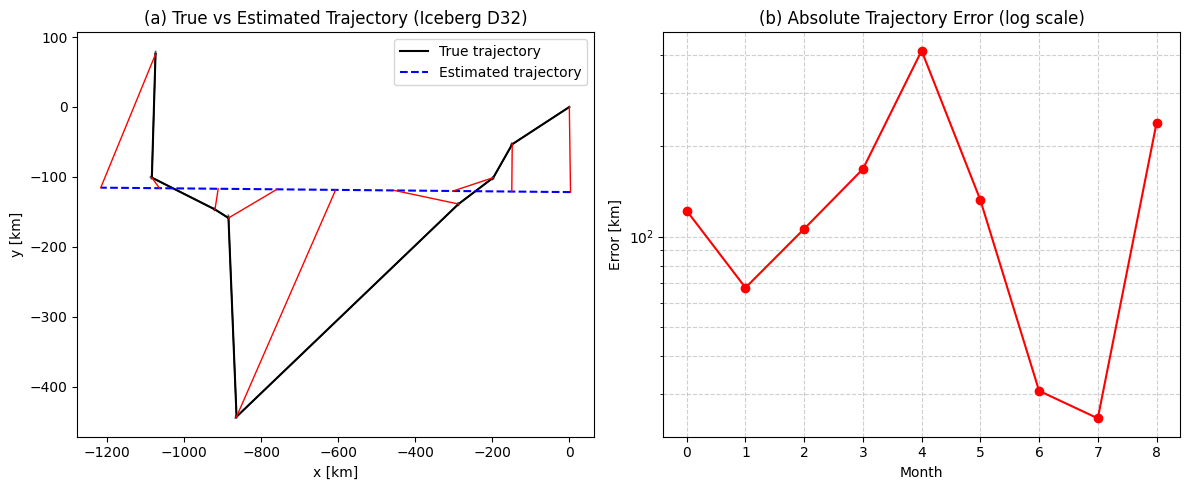

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ---------------------------
# Step 1: Load iceberg D32 data
# ---------------------------
csv_files = [
    "AntarcticIcebergs_20250110.csv",
    "AntarcticIcebergs_20250214.csv",
    "AntarcticIcebergs_20250306.csv",
    "AntarcticIcebergs_20250418.csv",
    "AntarcticIcebergs_20250522.csv",
    "AntarcticIcebergs_20250627.csv",
    "AntarcticIcebergs_20250724.csv",
    "AntarcticIcebergs_20250828.csv",
    "AntarcticIcebergs_20250918.csv"
]

iceberg_positions = []
for file in csv_files:
    df = pd.read_csv(file)
    df_d32 = df[df["Iceberg"] == "D32"]
    if not df_d32.empty:
        lat = df_d32["Latitude"].values[0]
        lon = df_d32["Longitude"].values[0]
        iceberg_positions.append((lat, lon))

lats, lons = zip(*iceberg_positions)
lats, lons = np.array(lats), np.array(lons)
months = np.arange(len(lats)).reshape(-1, 1)

# ---------------------------
# Step 2: Fit linear regression models
# ---------------------------
lat_model = LinearRegression().fit(months, lats)
lon_model = LinearRegression().fit(months, lons)
pred_lats = lat_model.predict(months)
pred_lons = lon_model.predict(months)

# ---------------------------
# Step 3: Convert to local XY coordinates in km
# ---------------------------
lat0, lon0 = lats[0], lons[0]
x_true = (lons - lon0) * 111 * np.cos(np.radians(lat0))
y_true = (lats - lat0) * 111
x_pred = (pred_lons - lon0) * 111 * np.cos(np.radians(lat0))
y_pred = (pred_lats - lat0) * 111

# ---------------------------
# Step 4: Compute Euclidean trajectory error
# ---------------------------
error = np.sqrt((x_true - x_pred)**2 + (y_true - y_pred)**2)

# ---------------------------
# Step 5: Two-panel visualization
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# (a) Trajectory comparison with error vectors
ax = axes[0]
ax.plot(x_true, y_true, 'k-', label='True trajectory')
ax.plot(x_pred, y_pred, 'b--', label='Estimated trajectory')
for i in range(len(x_true)):
    ax.plot([x_true[i], x_pred[i]], [y_true[i], y_pred[i]], 'r-', linewidth=1)
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.legend()
ax.set_title('(a) True vs Estimated Trajectory (Iceberg D32)')

# Direction arrows for visual motion
for i in range(len(x_true)-1):
    dx, dy = x_true[i+1]-x_true[i], y_true[i+1]-y_true[i]
    ax.arrow(x_true[i], y_true[i], dx, dy,
             head_width=5, head_length=5, fc='k', ec='k', alpha=0.5)

# (b) Absolute trajectory error (log scale)
ax2 = axes[1]
ax2.plot(error, 'ro-', label='Trajectory Error')
ax2.set_yscale('log')
ax2.set_xlabel('Month')
ax2.set_ylabel('Error [km]')
ax2.set_title('(b) Absolute Trajectory Error (log scale)')
ax2.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.show()


In [ ]:
import pandas as pd
import numpy as np

csv_files = [
    "AntarcticIcebergs_20250110.csv",
    "AntarcticIcebergs_20250214.csv",
    "AntarcticIcebergs_20250306.csv",
    "AntarcticIcebergs_20250418.csv",
    "AntarcticIcebergs_20250522.csv",
    "AntarcticIcebergs_20250627.csv",
    "AntarcticIcebergs_20250724.csv",
    "AntarcticIcebergs_20250828.csv",
    "AntarcticIcebergs_20250918.csv"
]

# Collect all iceberg positions across files
records = []
for file in csv_files:
    df = pd.read_csv(file)
    df["SourceFile"] = file
    records.append(df)
all_data = pd.concat(records)

# Group by iceberg and compute total drift (approximate)
def drift_range(g):
    return np.sqrt((g["Latitude"].max() - g["Latitude"].min())**2 +
                   (g["Longitude"].max() - g["Longitude"].min())**2)

drift_by_iceberg = all_data.groupby("Iceberg").apply(drift_range).sort_values(ascending=False)
print(drift_by_iceberg.head(10))


Iceberg
D32     28.820869
B22F    26.948254
B22A    25.786146
B22G    24.744116
A83     17.893295
C39     17.674991
A74A    17.456701
A84     15.629283
D35     14.059093
C18B    12.912881
dtype: float64


/tmp/ipython-input-219968093.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  drift_by_iceberg = all_data.groupby("Iceberg").apply(drift_range).sort_values(ascending=False)


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


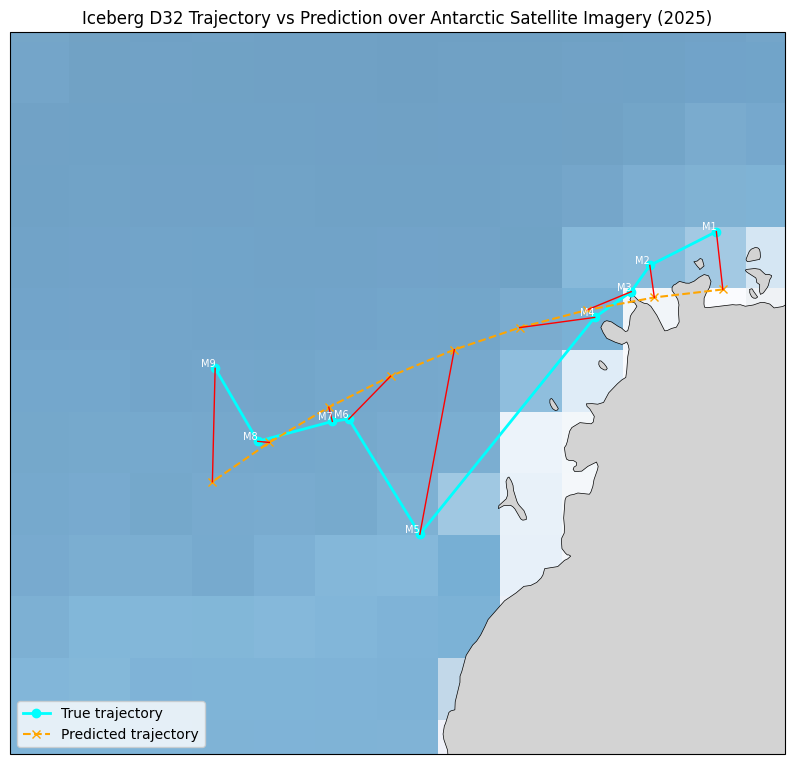

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from sklearn.linear_model import LinearRegression

# --- Load D32 as before ---
csv_files = [
    "AntarcticIcebergs_20250110.csv",
    "AntarcticIcebergs_20250214.csv",
    "AntarcticIcebergs_20250306.csv",
    "AntarcticIcebergs_20250418.csv",
    "AntarcticIcebergs_20250522.csv",
    "AntarcticIcebergs_20250627.csv",
    "AntarcticIcebergs_20250724.csv",
    "AntarcticIcebergs_20250828.csv",
    "AntarcticIcebergs_20250918.csv"
]

positions = []
for file in csv_files:
    df = pd.read_csv(file)
    df_d32 = df[df["Iceberg"] == "D32"]
    if not df_d32.empty:
        lat = df_d32["Latitude"].values[0]
        lon = df_d32["Longitude"].values[0]
        positions.append((lat, lon))

lats, lons = zip(*positions)
lats, lons = np.array(lats), np.array(lons)
months = np.arange(len(lats)).reshape(-1, 1)

# --- Predict with linear regression ---
lat_model = LinearRegression().fit(months, lats)
lon_model = LinearRegression().fit(months, lons)
pred_lats = lat_model.predict(months)
pred_lons = lon_model.predict(months)

# --- Visualization on satellite base map ---
fig = plt.figure(figsize=(10, 10))

# Use a background tile source (Stamen terrain or Blue Marble)
# Option 1: Stamen terrain
# tiles = cimgt.Stamen('terrain-background')
# ax = plt.axes(projection=tiles.crs)

# Option 2: Natural Earth or Blue Marble background
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.stock_img()  # Natural Earth shaded relief
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, zorder=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.2, zorder=1)

# Zoom in near the iceberg region
min_lat = min(min(lats), min(pred_lats)) - 3
max_lat = max(max(lats), max(pred_lats)) + 3
min_lon = min(min(lons), min(pred_lons)) - 3
max_lon = max(max(lons), max(pred_lons)) + 3
ax.set_extent([min_lon, max_lon, min_lat, max_lat], ccrs.PlateCarree())

# Plot actual and predicted trajectories
ax.plot(lons, lats, color='cyan', marker='o', linewidth=2,
        transform=ccrs.PlateCarree(), label='True trajectory')
ax.plot(pred_lons, pred_lats, color='orange', marker='x', linestyle='--',
        transform=ccrs.PlateCarree(), label='Predicted trajectory')

# Connect predicted–true points with red error lines
for i in range(len(lats)):
    ax.plot([lons[i], pred_lons[i]], [lats[i], pred_lats[i]],
            color='red', linewidth=1, transform=ccrs.PlateCarree())

# Annotate months for clarity
for i, (lat, lon) in enumerate(zip(lats, lons), start=1):
    ax.text(lon, lat, f"M{i}", transform=ccrs.PlateCarree(),
            fontsize=7, ha="right", va="bottom", color="white", zorder=5)

plt.title("Iceberg D32 Trajectory vs Prediction over Antarctic Satellite Imagery (2025)")
plt.legend(loc='lower left')
plt.show()


/tmp/ipython-input-25777132.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("plasma")
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


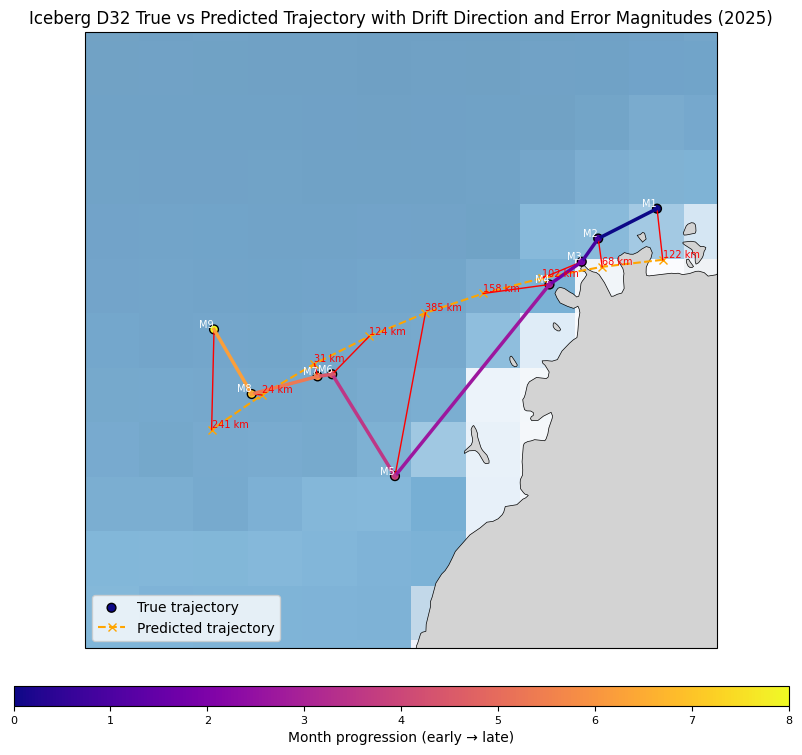

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap
from sklearn.linear_model import LinearRegression

# --- Load Iceberg D32 data ---
csv_files = [
    "AntarcticIcebergs_20250110.csv",
    "AntarcticIcebergs_20250214.csv",
    "AntarcticIcebergs_20250306.csv",
    "AntarcticIcebergs_20250418.csv",
    "AntarcticIcebergs_20250522.csv",
    "AntarcticIcebergs_20250627.csv",
    "AntarcticIcebergs_20250724.csv",
    "AntarcticIcebergs_20250828.csv",
    "AntarcticIcebergs_20250918.csv"
]

positions = []
for file in csv_files:
    df = pd.read_csv(file)
    df_d32 = df[df["Iceberg"] == "D32"]
    if not df_d32.empty:
        positions.append((df_d32["Latitude"].values[0], df_d32["Longitude"].values[0]))

lats, lons = np.array([p[0] for p in positions]), np.array([p[1] for p in positions])
months = np.arange(len(lats)).reshape(-1, 1)

# --- Linear Regression Prediction ---
lat_model = LinearRegression().fit(months, lats)
lon_model = LinearRegression().fit(months, lons)
pred_lats = lat_model.predict(months)
pred_lons = lon_model.predict(months)

# --- Calculate Euclidean error in km ---
def deg2km(dlat, dlon, lat):
    km_per_deg_lat = 111
    km_per_deg_lon = 111 * np.cos(np.radians(lat))
    return np.sqrt((dlat * km_per_deg_lat)**2 + (dlon * km_per_deg_lon)**2)

errors_km = [deg2km(pred_lats[i]-lats[i], pred_lons[i]-lons[i], lats[i]) for i in range(len(lats))]

# --- Visualization setup ---
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.stock_img()
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)

# Zoom around iceberg region
pad = 3
ax.set_extent([min(lons)-pad, max(lons)+pad, min(lats)-pad, max(lats)+pad], ccrs.PlateCarree())

# --- True trajectory with color gradient ---
cmap = get_cmap("plasma")
for i in range(len(lons)-1):
    ax.plot(lons[i:i+2], lats[i:i+2], color=cmap(i/len(lons)),
            linewidth=2.5, transform=ccrs.PlateCarree(), zorder=3)
sc = ax.scatter(lons, lats, c=np.arange(len(lons)), cmap=cmap, s=40, edgecolor='black',
                transform=ccrs.PlateCarree(), label='True trajectory')

# --- Predicted trajectory (orange dashed) ---
ax.plot(pred_lons, pred_lats, color='orange', linestyle='--', marker='x',
        transform=ccrs.PlateCarree(), label='Predicted trajectory', zorder=2)

# --- Error lines + magnitude annotations ---
for i in range(len(lons)):
    ax.plot([lons[i], pred_lons[i]], [lats[i], pred_lats[i]], color='red',
            linewidth=1, transform=ccrs.PlateCarree())
    # Error label (e.g., “57 km”)
    ax.text(pred_lons[i], pred_lats[i], f"{errors_km[i]:.0f} km", fontsize=7, color='red',
            ha='left', va='bottom', transform=ccrs.PlateCarree())

# --- Drift direction arrows (quiver) ---
u = np.diff(lons)
v = np.diff(lats)
ax.quiver(lons[:-1], lats[:-1], u, v, transform=ccrs.PlateCarree(),
          scale_units='xy', scale=1, color='white', width=0.005, alpha=0.8,
          headwidth=3, headlength=3)

# --- Month labels ---
for i, (lat, lon) in enumerate(zip(lats, lons), start=1):
    ax.text(lon, lat, f"M{i}", transform=ccrs.PlateCarree(),
            fontsize=7, ha='right', va='bottom', color='white', zorder=4)

# --- Colorbar (month progression) ---
cb = plt.colorbar(sc, orientation='horizontal', pad=0.05, aspect=40,
                  label='Month progression (early → late)')
cb.ax.tick_params(labelsize=8)

plt.title("Iceberg D32 True vs Predicted Trajectory with Drift Direction and Error Magnitudes (2025)")
plt.legend(loc='lower left')
plt.show()


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


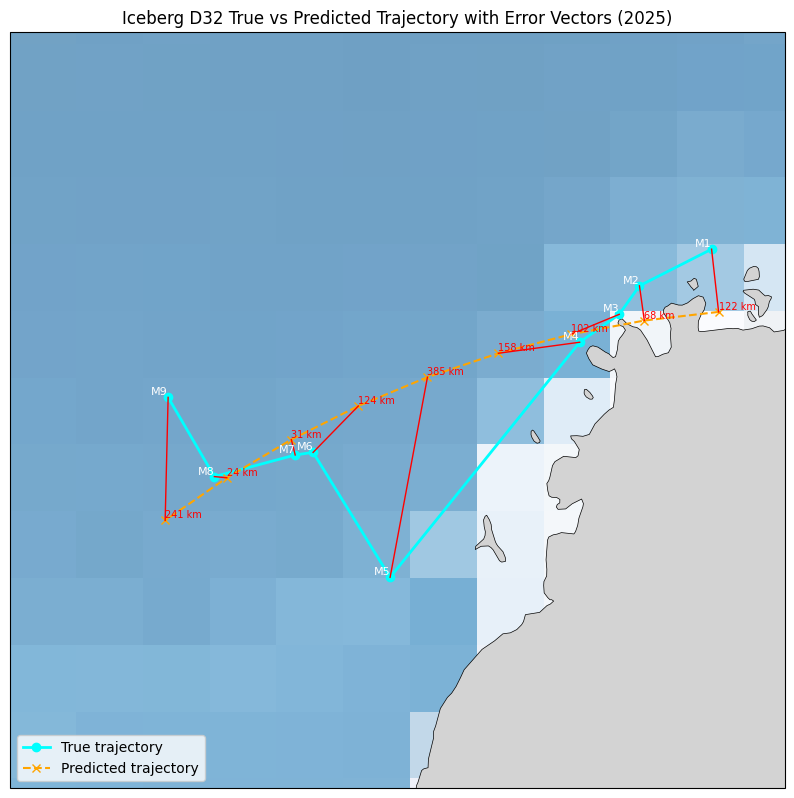

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.linear_model import LinearRegression

# --- Load Iceberg D32 data ---
csv_files = [
    "AntarcticIcebergs_20250110.csv",
    "AntarcticIcebergs_20250214.csv",
    "AntarcticIcebergs_20250306.csv",
    "AntarcticIcebergs_20250418.csv",
    "AntarcticIcebergs_20250522.csv",
    "AntarcticIcebergs_20250627.csv",
    "AntarcticIcebergs_20250724.csv",
    "AntarcticIcebergs_20250828.csv",
    "AntarcticIcebergs_20250918.csv"
]

positions = []
for file in csv_files:
    df = pd.read_csv(file)
    df_d32 = df[df["Iceberg"] == "D32"]
    if not df_d32.empty:
        positions.append((df_d32["Latitude"].values[0], df_d32["Longitude"].values[0]))

lats, lons = np.array([p[0] for p in positions]), np.array([p[1] for p in positions])
months = np.arange(len(lats)).reshape(-1, 1)

# --- Regression model for prediction ---
lat_model = LinearRegression().fit(months, lats)
lon_model = LinearRegression().fit(months, lons)
pred_lats = lat_model.predict(months)
pred_lons = lon_model.predict(months)

# --- Error magnitude calculation (in km) ---
def deg2km(dlat, dlon, lat):
    km_lat = 111
    km_lon = 111 * np.cos(np.radians(lat))
    return np.sqrt((dlat * km_lat)**2 + (dlon * km_lon)**2)

errors_km = [deg2km(pred_lats[i]-lats[i], pred_lons[i]-lons[i], lats[i]) for i in range(len(lats))]

# --- Create Antarctic map ---
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.stock_img()  # Antarctic imagery background
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, zorder=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.2, zorder=1)

# Focus map near iceberg region
pad = 3
ax.set_extent([min(lons)-pad, max(lons)+pad, min(lats)-pad, max(lats)+pad], ccrs.PlateCarree())

# --- Plot true trajectory (cyan) ---
ax.plot(lons, lats, color='cyan', marker='o', linewidth=2,
        transform=ccrs.PlateCarree(), label='True trajectory')

# --- Plot predicted trajectory (orange dashed) ---
ax.plot(pred_lons, pred_lats, color='orange', marker='x', linestyle='--',
        transform=ccrs.PlateCarree(), label='Predicted trajectory')

# --- Error connectors with magnitudes ---
for i in range(len(lats)):
    ax.plot([lons[i], pred_lons[i]], [lats[i], pred_lats[i]],
            color='red', linewidth=1, transform=ccrs.PlateCarree())
    ax.text(pred_lons[i], pred_lats[i], f"{errors_km[i]:.0f} km",
            color='red', fontsize=7, ha='left', va='bottom',
            transform=ccrs.PlateCarree())

# --- Month labels ---
for i, (lat, lon) in enumerate(zip(lats, lons), start=1):
    ax.text(lon, lat, f"M{i}", fontsize=8, ha='right', va='bottom',
            color='white', transform=ccrs.PlateCarree(), zorder=4)

# --- Optional: drift direction arrows (white) ---
u = np.diff(lons)
v = np.diff(lats)
ax.quiver(lons[:-1], lats[:-1], u, v, transform=ccrs.PlateCarree(),
          scale_units='xy', scale=1, color='white', width=0.005,
          headwidth=3, headlength=3, alpha=0.8)

# --- Title & Legend ---
plt.title("Iceberg D32 True vs Predicted Trajectory with Error Vectors (2025)")
plt.legend(loc='lower left')
plt.show()


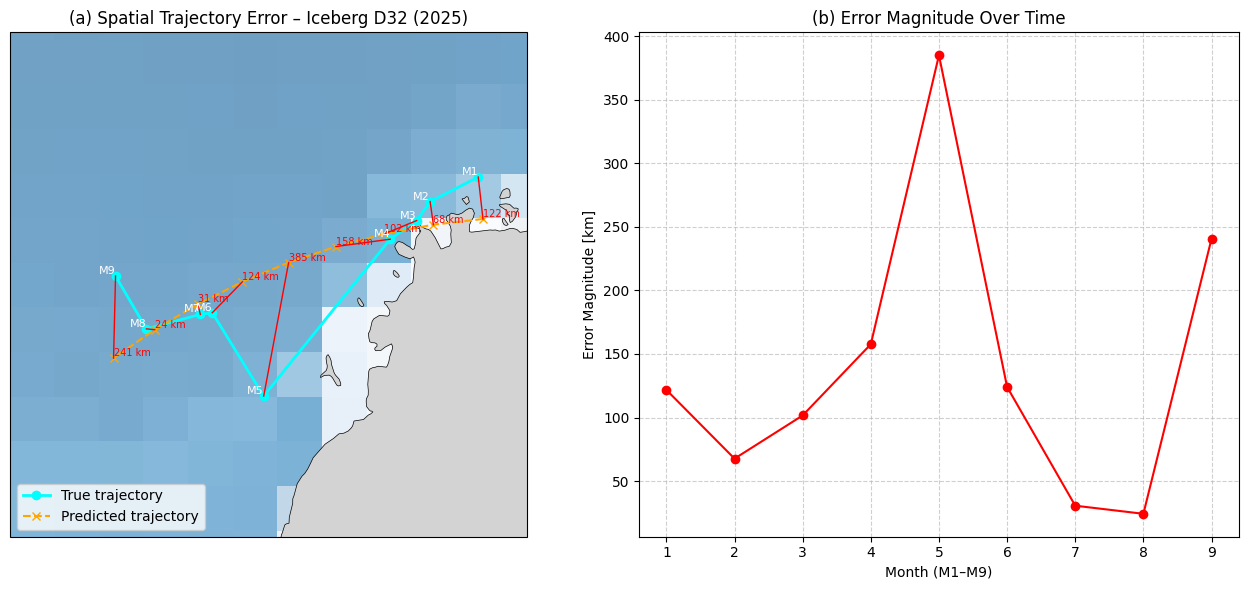

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.linear_model import LinearRegression

# --- Load Iceberg D32 data ---
csv_files = [
    "AntarcticIcebergs_20250110.csv",
    "AntarcticIcebergs_20250214.csv",
    "AntarcticIcebergs_20250306.csv",
    "AntarcticIcebergs_20250418.csv",
    "AntarcticIcebergs_20250522.csv",
    "AntarcticIcebergs_20250627.csv",
    "AntarcticIcebergs_20250724.csv",
    "AntarcticIcebergs_20250828.csv",
    "AntarcticIcebergs_20250918.csv"
]

positions = []
for file in csv_files:
    df = pd.read_csv(file)
    df_d32 = df[df["Iceberg"] == "D32"]
    if not df_d32.empty:
        positions.append((df_d32["Latitude"].values[0], df_d32["Longitude"].values[0]))

lats, lons = np.array([p[0] for p in positions]), np.array([p[1] for p in positions])
months = np.arange(len(lats)).reshape(-1, 1)

# --- Regression model prediction ---
lat_model = LinearRegression().fit(months, lats)
lon_model = LinearRegression().fit(months, lons)
pred_lats = lat_model.predict(months)
pred_lons = lon_model.predict(months)

# --- Error magnitude in km ---
def deg2km(dlat, dlon, lat):
    km_lat = 111
    km_lon = 111 * np.cos(np.radians(lat))
    return np.sqrt((dlat * km_lat)**2 + (dlon * km_lon)**2)

errors_km = [deg2km(pred_lats[i]-lats[i], pred_lons[i]-lons[i], lats[i]) for i in range(len(lats))]

# --- Create figure with two panels ---
fig = plt.figure(figsize=(13, 6))

# (a) Antarctic Map (spatial visualization)
ax1 = plt.subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
ax1.stock_img()
ax1.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax1.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax1.add_feature(cfeature.BORDERS, linewidth=0.2)

# Focus near iceberg region
pad = 3
ax1.set_extent([min(lons)-pad, max(lons)+pad, min(lats)-pad, max(lats)+pad], ccrs.PlateCarree())

# Plot true & predicted paths
ax1.plot(lons, lats, color='cyan', marker='o', linewidth=2,
         transform=ccrs.PlateCarree(), label='True trajectory')
ax1.plot(pred_lons, pred_lats, color='orange', linestyle='--', marker='x',
         transform=ccrs.PlateCarree(), label='Predicted trajectory')

# Error vectors with magnitudes
for i in range(len(lats)):
    ax1.plot([lons[i], pred_lons[i]], [lats[i], pred_lats[i]],
             color='red', linewidth=1, transform=ccrs.PlateCarree())
    ax1.text(pred_lons[i], pred_lats[i], f"{errors_km[i]:.0f} km",
             fontsize=7, color='red', ha='left', va='bottom',
             transform=ccrs.PlateCarree())

# Month labels
for i, (lat, lon) in enumerate(zip(lats, lons), start=1):
    ax1.text(lon, lat, f"M{i}", fontsize=8, ha='right', va='bottom',
             color='white', transform=ccrs.PlateCarree(), zorder=4)

ax1.set_title("(a) Spatial Trajectory Error – Iceberg D32 (2025)")
ax1.legend(loc='lower left')

# (b) Error magnitude vs month
ax2 = plt.subplot(1, 2, 2)
ax2.plot(np.arange(1, len(errors_km)+1), errors_km, 'ro-', linewidth=1.5, markersize=6)
ax2.set_xlabel("Month (M1–M9)")
ax2.set_ylabel("Error Magnitude [km]")
ax2.set_title("(b) Error Magnitude Over Time")
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
